# Дана функция f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

### Импорт необходимых библиотек

In [1]:
import sympy
#import scipy.optimize
from scipy.optimize import *
import math
import matplotlib.pyplot

### Определение функции

In [2]:
# Define the variable x as a symbol
x = sympy.Symbol('x')

# Define the function f(x) as an expression
f = -12*x**4*sympy.sin(sympy.cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30

# Create a function from the expression
f_func = sympy.lambdify(x, f)

### Вычисление корней функции (для интервала -10:10) и интервалы f >0, f<0

In [3]:
# Define a function to pass to brentq()
def func(x):
    return f_func(x)

# Find the roots of the function in the interval [-10, 10] using brentq()
roots = []
for i in range(-10, 11):
    try:
        root = brentq(func, i, i+1, xtol=1e-6, maxiter=100)
        if -10 <= root <= 10:
            roots.append(root)
    except ValueError:
        pass

# Print the roots
print(roots)

roots.sort()
positive_intervals = []
negative_intervals = []

for i in range(len(roots) - 1):
    if (i != 0 and roots[i] < roots[i+1]) or (i == 0 and roots[i] > roots[i+1]):
        positive_intervals.append((roots[i], roots[i+1]))
    else:
        negative_intervals.append((roots[i], roots[i+1]))

print(f"Интервалы, на которых f > 0 = {positive_intervals}")
print(f"Интервалы, на которых f < 0 = {negative_intervals}")

[-7.650622282654667, -5.026865813665481, -1.3389666393009247, 2.2730567422963914, 4.383523698048977, 8.035164124907668]
Интервалы, на которых f > 0 = [(-5.026865813665481, -1.3389666393009247), (-1.3389666393009247, 2.2730567422963914), (2.2730567422963914, 4.383523698048977), (4.383523698048977, 8.035164124907668)]
Интервалы, на которых f < 0 = [(-7.650622282654667, -5.026865813665481)]


### Вычисление корней производной функции

In [4]:
# Create a function from the derivative
dfdx = sympy.diff(f, x)
dfdx_func = sympy.lambdify(x, dfdx)

# Find the roots of the derivative in the interval [-10, 10] using brentq()
derivative_roots = []
for i in range(-10, 11):
    try:
        root = brentq(lambda x: dfdx_func(x), i, i+1, xtol=1e-6, maxiter=100)
        if -10 <= root <= 10:
            derivative_roots.append(root)
    except ValueError:
        pass

# Print the roots of the derivative
print(derivative_roots)

[-9.97895376109537, -6.831369792060369, -4.167783523860014, -0.3926773311191577, 0.4545735626128944, 1.7006073817940357, 3.81931087392766, 7.001031859534562, 9.877149053444247]


### Найти интервалы, на которых функция возрастает и убывает

In [5]:
# Sort the roots of the derivative
derivative_roots.sort()

# Determine the intervals where the function is increasing or decreasing
increasing_intervals = []
decreasing_intervals = []
for i in range(len(derivative_roots) - 1):
    if (i != 0 and derivative_roots[i] < derivative_roots[i+1]) or (i == 0 and derivative_roots[i] > derivative_roots[i+1]):
        increasing_intervals.append((derivative_roots[i], derivative_roots[i+1]))
    else:
        decreasing_intervals.append((derivative_roots[i], derivative_roots[i+1]))

print("Интервалы возрастания:", increasing_intervals)
print("Интервалы убывания:", decreasing_intervals)

Интервалы возрастания: [(-6.831369792060369, -4.167783523860014), (-4.167783523860014, -0.3926773311191577), (-0.3926773311191577, 0.4545735626128944), (0.4545735626128944, 1.7006073817940357), (1.7006073817940357, 3.81931087392766), (3.81931087392766, 7.001031859534562), (7.001031859534562, 9.877149053444247)]
Интервалы убывания: [(-9.97895376109537, -6.831369792060369)]


### Построить график

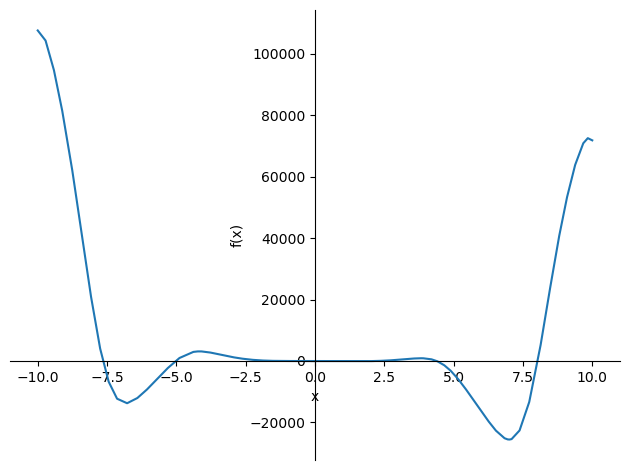

-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30


In [8]:
from sympy import *
import matplotlib.pyplot as plt

#x = Symbol('x')
#f = - 12*x**4*sin(cos (x))-18*x**3+5*x**2 + 10*x-30
plot (f)
print(f)

### Вычислить локальный максимум (для интервала -10:10)

In [9]:
import math
import scipy.optimize

f = lambda x: -12*x**4*math.sin(math.cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30
neg_f = lambda x: -f(x)

result = scipy.optimize.minimize_scalar(neg_f, bounds=[-10, 10], method='brent')

print(f"Значение x локального максимума= {result.x}")
print(f"Значение функции локального максимума = {f(result.x)}")

Значение x локального максимума= -16.080517522044396
Значение функции локального максимума = 719825.6834275705


### Вычислить локальный минимум (для интервала -10:10)

In [10]:
#import scipy.optimize
#import math

def f(x):
  return -12*x**4*math.sin(math.cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30

result = scipy.optimize.minimize_scalar(f, bounds=[-10, 10], method='brent')

print(f"Значение x локального минимума = {result.x}")
print(f"Значение функции локального минимума =  {f(result.x)}")

Значение x локального минимума = 1.7006072856679202
Значение функции локального минимума =  -74.1062930861087
